# Ch 4 - Inferential Statistics

In Tuesday's class you had learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Exercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 

## Lab Setup

In [111]:
import pandas as pd
import numpy as np
rng_seed = 42
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
import zipfile
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import otter
grader = otter.Notebook()

In [112]:
# set up random number generator 
rng = np.random.default_rng(rng_seed)

## Examples 

### Importing datafiles



#### Importing Excel files
For importing the files as with multiple sheet in excel workbook, in Python 3.0, could use `pd.read_excel()`.

For example, if workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use `pd.read_excel('workbook.xlsx', 'Sheet1')` or  `('workbook.xlsx', 'Sheet2')`. 



#### Importing from Zipped files 

Now, try importing csv file present inside the zip file named 'avocado' directly (make use of 'zipfile' module).
* https://docs.python.org/3/library/zipfile.html

In [113]:
# Example code of how to load in data stored within a zip-file
# import zipfile  # already imported above 
zf = zipfile.ZipFile('data/avocado.zip')
avacado = pd.read_csv(zf.open('avocado.csv'))
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### System information 

If you ever need to check which version of Python or what version of a module you are working with you can use something similar to the following code. 

In [114]:
# Get to know your system versions
# import sys  # already imported above
print('Python version:', sys.version, '\n')
print('Pandas version:', np.__version__ , '\n')
print('Seaborn version: ', sns.__version__, '\n')

Python version: 3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0] 

Pandas version: 1.25.2 

Seaborn version:  0.12.2 



Let's load the wine data again.

In [115]:
# Load wine data 
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [116]:
wine.shape

(1599, 12)

# Inferential Statistics

The piece of code below is adapted from `nb.week4.ipynb` class material. A sample of size 5 is selected and the mean is calculated.  This is repeated 1000 times, collecting the sample means. 
A histogram function is invoked for sampled means. 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?

mean pH, mu = 3.3111131957473416


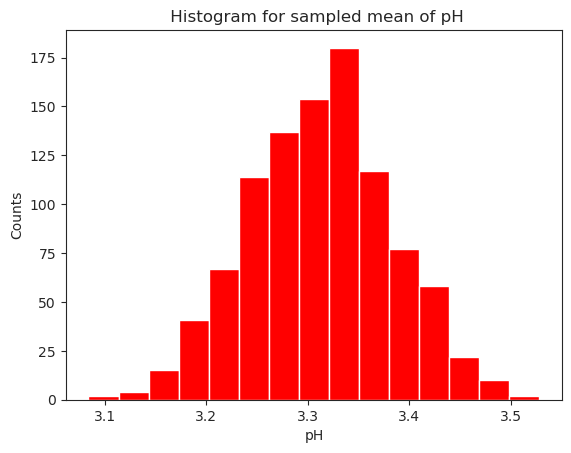

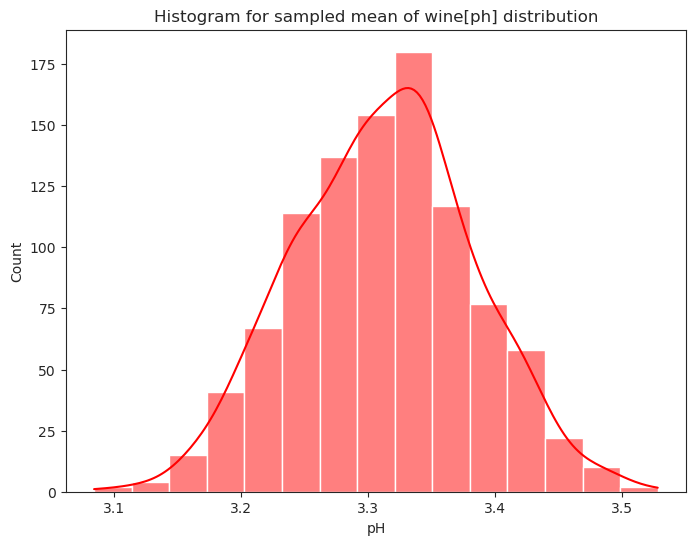

In [117]:
'''The piece of code from nb.week3.ipynb is provided, use it to  
compute the mean for the 'n' random samples and store in array, means[i]
This is repeated 'N_tests' times. '''

mu = wine["pH"].mean()                                # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                        # Num of test to perform
n = 5                                                 # number of samples
means = [0] * N_tests                                 #creating a list named means with N_tests values which are initialized with 0

for i in range(N_tests):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    
# Histogram in Matplotlib    
nbins = 15
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')
plt.xlabel('pH')
plt.ylabel('Counts')

# Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()

### Central Limit Theorem

From Chap 4, we had a chance to look into Central Limit Theorem. The initial population distribution was not observed in the class and the mean sampled distribution, i.e., mean of `wine['pH']`, evidently displayed normal distribution (see the plots above).



<!-- BEGIN QUESTION -->

## Exercise 1

Check what was the distribution of the initial population ? Create the  Histogram and read the discussion below.

https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

In [ ]:
# Ploting the distribution of the population itself i.e., wine['pH']. 
# Using seaborn to create the histogram
sns.set_style('whitegrid')
sns.set_style('ticks')
fig.set_size_inches(12, 8)
sns.histplot(wine['pH'], bins = 20, kde = True, color = 'black', edgecolor='black')
plt.title('Histogram for wine[pH] distribution')
plt.xlabel('pH')

plt.show()



NameError: name 'sns' is not defined

<!-- END QUESTION -->

Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with Central Limit Theorem?

For options regarding random numbers generation in certain distribution pattern, see the link:  
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

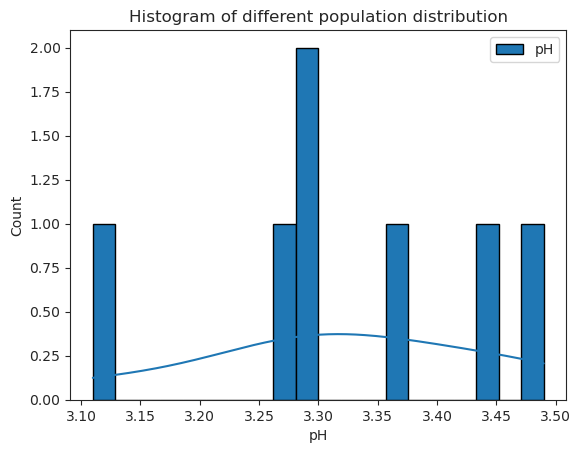

In [119]:
# trying with different population distribution using random generator

N_tests = 2000                                        # Num of test to perform
n = 7                                                 # number of samples
pH_sample = [0] * N_tests                             #creating a list named means with N_tests values which are initialized with 0

for i in range(N_tests):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    pH_sample[i] = sampled_wines["pH"]
    
# Histogram in seaborn
sns.set_style('darkgrid')
sns.set_style('ticks')
fig.set_size_inches(12, 6)
sns.histplot(pH_sample, bins=20, color ='blue',edgecolor='black', kde=True,alpha=1)
plt.title('Histogram of different population distribution')
plt.xlabel('pH')
plt.show()

*Think about:* What if the initial population is other than normal distribution. Would CLT come into picture? 



**As we can see the above distribution of different population it is not normal distribution here in this case as we are taking one sample we can say the CLT is not being applicable.**

## Exercise 2 - Uniform distribution

In Exercise 1, the distribution of wine pH values is approximately normal.  What about if this data follows another distribution?  How does it affect the distribution of the sampled means?

Let's look if the initial data came from a Uniform distribution.

<!-- BEGIN QUESTION -->



In [120]:
# Create a pandas DataSeries - created using random numbers 
#  Sample 1000 numbers from the uniform distribution - unif(0,1) 
#  Hint: look at np.random.uniform() function, using the random number generator
#   seeded above:  rng.uniform()

s = pd.Series(rng.uniform(0,1,1000))
s.head(5)


0    0.690855
1    0.636528
2    0.631145
3    0.206704
4    0.579347
dtype: float64

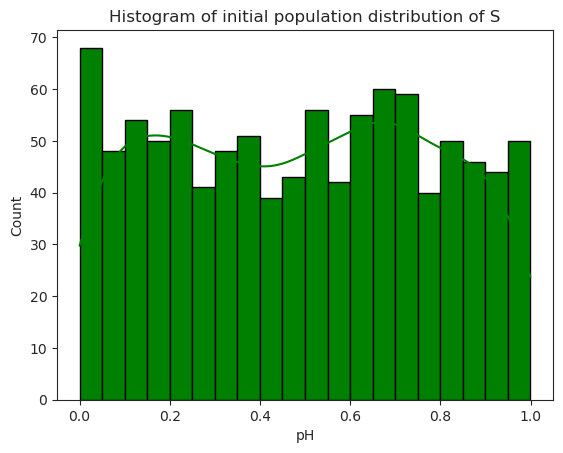

In [121]:
# Plot a histogram for the initial population, stored in 's'
#  Use seaborn for the plot 

sns.set_style('darkgrid')
sns.set_style('ticks')
fig.set_size_inches(12, 6)
sns.histplot(s, bins=20, color ='green', edgecolor='black',kde=True,alpha=1)
plt.title('Histogram of initial population distribution of S')
plt.xlabel('pH')
plt.show()



mean population, mu = 0.4891918835163497


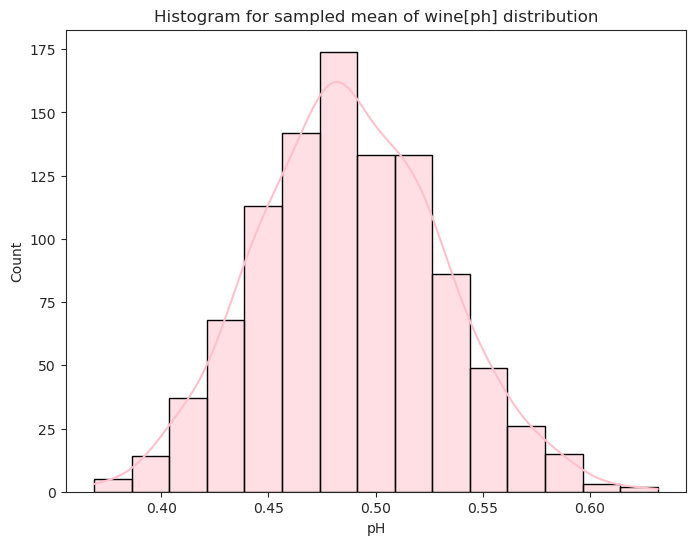

In [122]:
# In this cell, collection of 'n' random samples 'N-test' times 
#  storing the mean of each collection in the array.  
# Then, create a histogram of the sampled means. 

# As a start I have copied the most of the code for where this was done for wine-pH.  
# Modify it to get the sample means of the uniformly distributed sample population.

mu = s.mean() 
print("mean population, mu = " + str(mu))

N_tests = 1000
n = 50 
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15
# Create a histogram of the sampled means from the uniform distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='pink',edgecolor='black', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')
plt.show()


<!-- END QUESTION -->

#####  Once the code is up and running. Examine the following for better understanding. 
 * How is plot sensitive for 'n' - no of samples drawn from population?
 * How does the profile change when 'N_test' - is increased or decreased?

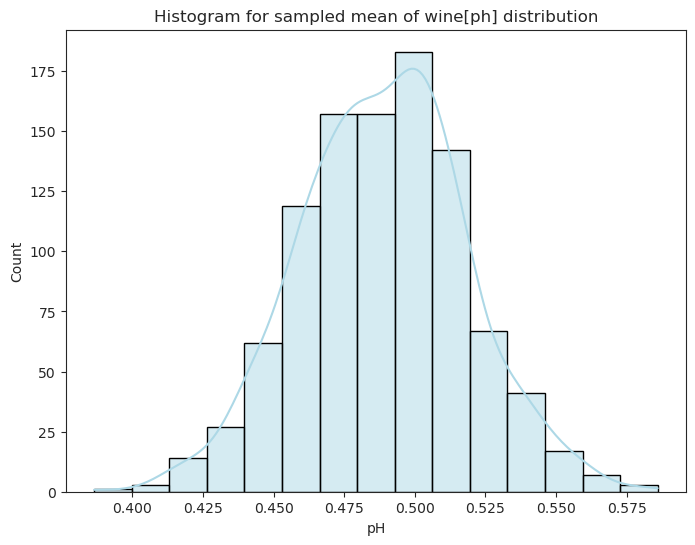

In [123]:
# How is plot sensitive for 'n' - no of samples drawn from population?
# if n is changed observe the plot 
n = 100

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15

# Create a histogram of the sampled means from the uniform distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='lightblue', edgecolor='black',kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')
plt.show()


**As we can see even though the sample size is changing the plot is following the normal distribution and we can say that the CLT applicable here**

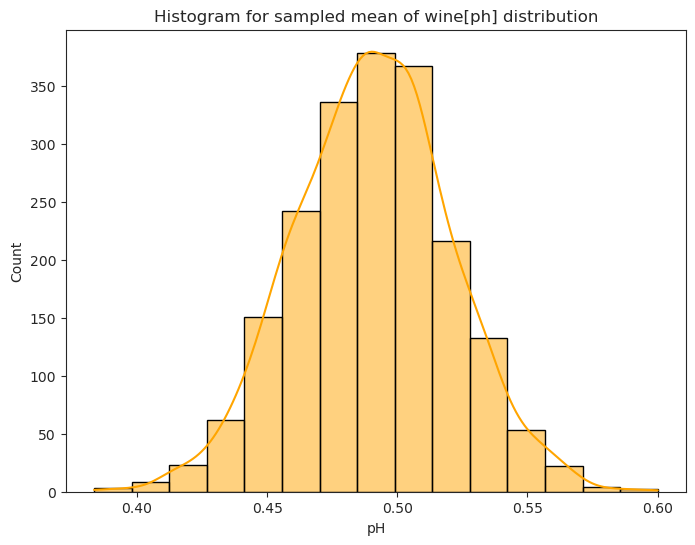

In [124]:
# How does the profile change when 'N_test' - is increased or decreased?
# let's consider that N_test is increased observe the plot 

N_tests = 2000
n = 100
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15

# Create a histogram of the sampled means from the uniform distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='orange', edgecolor='black',kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')
plt.show()


**As we can see if N_tests are increased the plot is clearly a normal distribution and it follows the CLT.** 

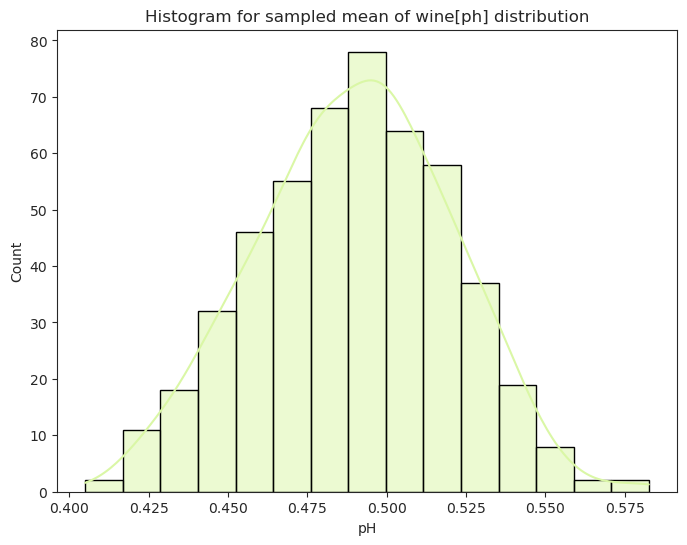

In [125]:
# what if N_tests are decreased and observe the plot 
N_tests = 500
n = 100
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15

# Create a histogram of the sampled means from the uniform distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='#DAF7A6', edgecolor='black',kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')
plt.show()

**As we can see even though if N_tests are decreased the plot is mostly a normal distribution and it follows the CLT.** 

<!-- BEGIN QUESTION -->

## Exercise 3 - Gamma distributions

Let's examine this again if the initial data is from a Gamma distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

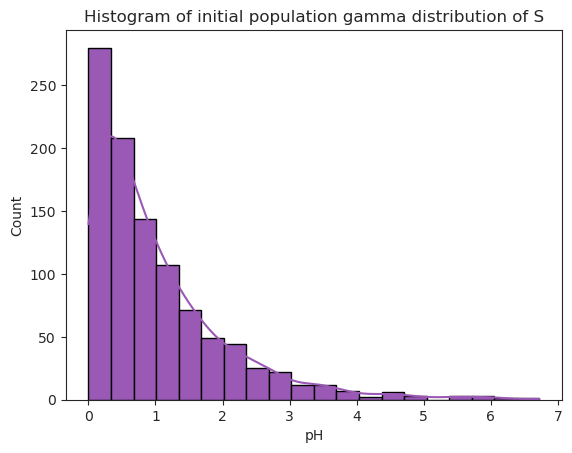

mean of random dataset, mu = 1.0107573905517304


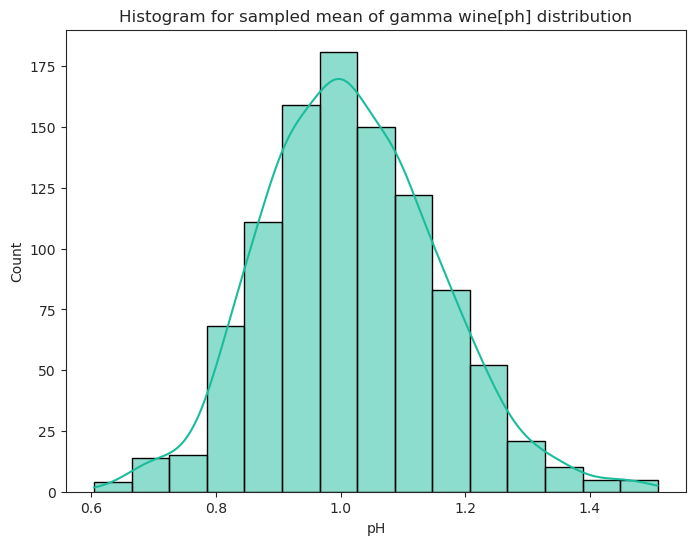

In [126]:

# Perform the similar operation as above but on a different distribution, e.g., gamma. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Gamma distribution function - np.random.gamma
#   with the random number generator - rng.gamma

s = pd.Series(rng.gamma(1,1,size=1000))



# Histogram plot of initial gamma population

sns.set_style('darkgrid')
sns.set_style('ticks')
fig.set_size_inches(12, 6)
sns.histplot(s, bins=20, color ='#9B59B6', edgecolor='black',kde=True,alpha=1)
plt.title('Histogram of initial population gamma distribution of S')
plt.xlabel('pH')
plt.show()

mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()


nbins = 15

# Histogram of sampled means of gamma distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='#1ABC9C', edgecolor='black',kde=True)
plt.title('Histogram for sampled mean of gamma wine[ph] distribution')
plt.xlabel('pH')
plt.show()
 
 
 

**As we can see for the gamma distribution of initial population it is not a normal distribution and CLT is not applicable but when we try to plot the sample means of gamma distribution it does agree with the CLT.** 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 4 - Wald distributions

Let's examine this again if the initial data is from a Wald distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

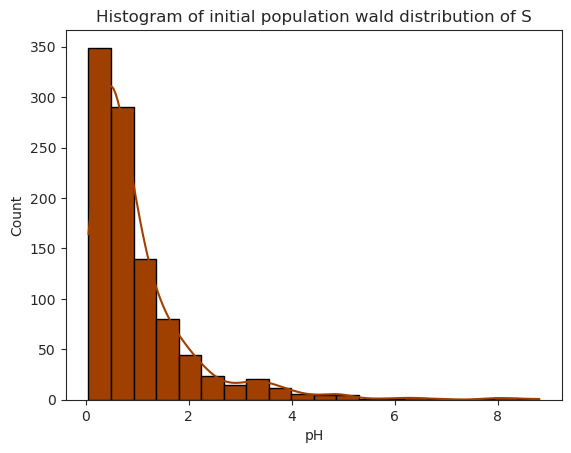

mean of random dataset, mu = 1.0356107811094977


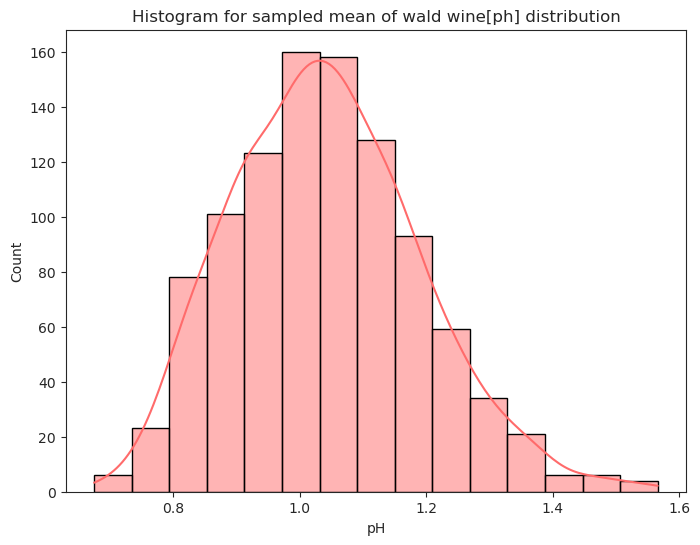

In [127]:

# Perform the similar operation as above but on a different distribution, e.g., wald. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Wald distribution function - np.random.wald
#  use the random number generator - rng.wald 
 

s = pd.Series(rng.wald(1,1,size=1000))



# Histogram plot of initial wald population

sns.set_style('darkgrid')
sns.set_style('ticks')
fig.set_size_inches(12, 6)
sns.histplot(s, bins=20, color ='#A04000', edgecolor='black',kde=True,alpha=1)
plt.title('Histogram of initial population wald distribution of S')
plt.xlabel('pH')
plt.show()

mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()


nbins = 15

# Histogram of sampled means of wald distribution

sns.set_style('darkgrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='#FF6B6B', edgecolor='black',kde=True)
plt.title('Histogram for sampled mean of wald wine[ph] distribution')
plt.xlabel('pH')
plt.show()
 
 
 

**As we can see for the wald distribution of initial population it is not a normal distribution and CLT is not applicable but when we try to plot the sample means of wald distribution it does agree with the CLT.** 

<!-- END QUESTION -->

## Measuring Variability of Estimates

Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  



<!-- BEGIN QUESTION -->

## Exercise 5 - Confidence Intervals

Refer to section 4.3.1 and 4.3.2 in the textbook and from `nb.week4` notebook. 

**Q** Explain in words (in the below Markdown cell), what is a Confidence Interval? 

**Q** What does it mean 95% C.I ? 

**ANSWER HERE:**
* A plausible range of values which are used for estimating the sample parameter from the population is called a confidence interval.
* 95% of confidence interval means that we are 95% confident that our confident interval will contain the true mean of the population but there is also remaining 5% perccent which may prove us wrong. In short terms it refers to level of confidence associated with the interval.

<!-- END QUESTION -->

### Example - Confidence Intervals

Spend some time reviewing https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from `nb.week4`. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* Check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

We are 99.0 % confident that the interval,
   [3.0002481785447266, 3.642608964312415] contains the mean.


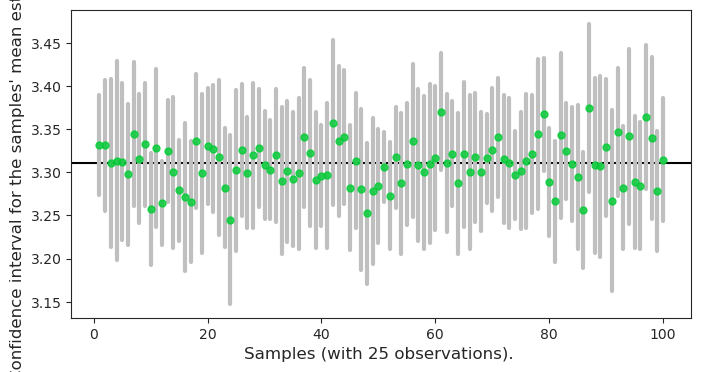

In [128]:
''' observe the output plot while changing the Confidence level, 
no of samples and no of times the test is performed '''

# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

We are 90.0 % confident that the interval,
   [3.086577381229681, 3.54222261877032] contains the mean.


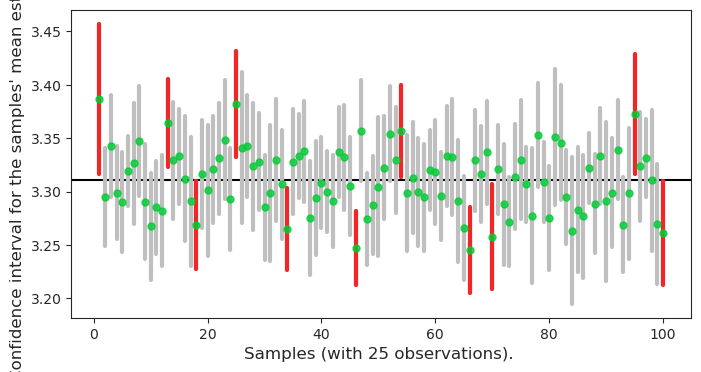

In [129]:
# changing the Confidence level to 90% 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.1

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

We are 95.0 % confident that the interval,
   [2.9721771768540317, 3.5510228231459684] contains the mean.


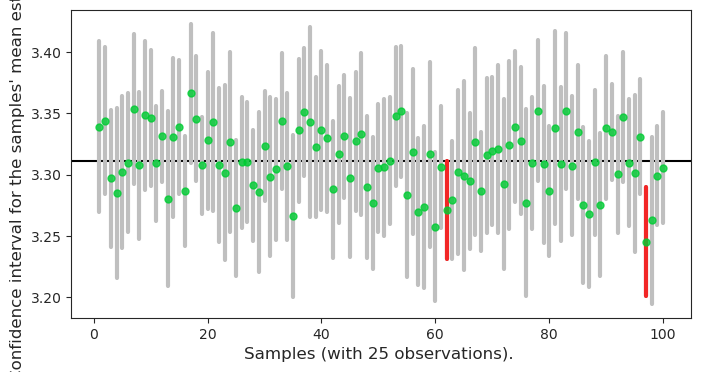

In [130]:
# changing the Confidence level to 95 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

We are 99.9 % confident that the interval,
   [2.9257519545903508, 3.6854480454096485] contains the mean.


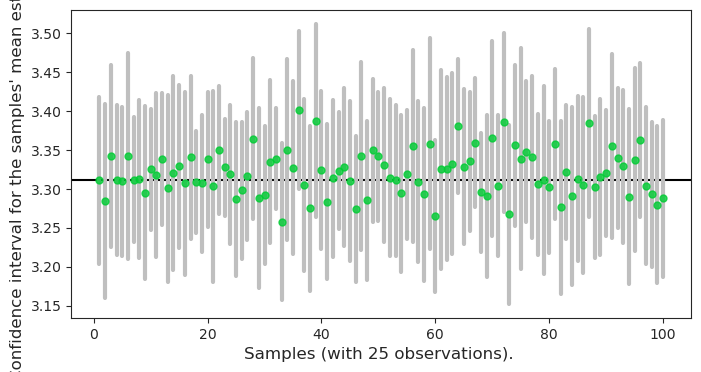

In [131]:
# changing the Confidence level to 99.9% 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.001

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

**As we can see when we are changing the confidence level is changed to 90% --> 95% --> 99% --> 99.9 %**
* In 90% confidence interval by the observations from the plot there seems to be many flag outliners. This means in that places the flag CI do not contain the "true" mean.
* In 95% confidence interval by the observations from the plot there seems to be only two outliners it is very less when compared to 90% confidence level.
* In case of 99% and 99.9% confidence level from the plot we can say that there are no outliners. This means that we don't have flag outliners so every ci has true mean.
* **we can say that by increasing the confidence level the outliers will be decreased.**


**Checking with different number of samples**

We are 95.0 % confident that the interval,
   [2.9886235706636195, 3.58657642933638] contains the mean.


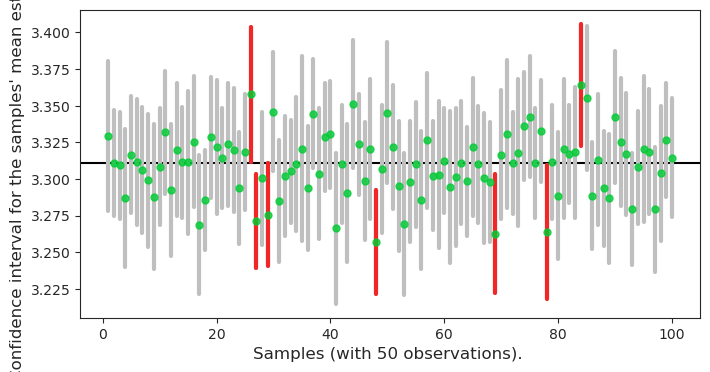

In [132]:
# changing the number of samples to 50 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 50

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

**By changing the number of samples of to 50 we can see that there are more flag outliners count 7 which says in those certain places CI doesn't contain the true mean.**

We are 95.0 % confident that the interval,
   [3.0289171455283994, 3.6002828544716015] contains the mean.


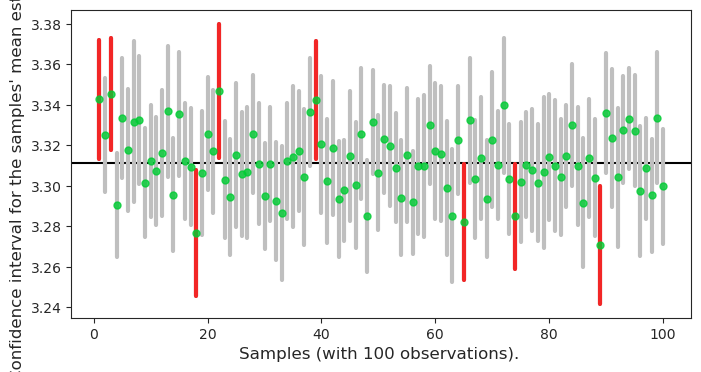

In [133]:
# changing the number of samples to 100 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 100

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

**By changing the number of samples of to 100 we can see that there are more flag outliners count 8 which says in those certain places CI doesn't contain the true mean.**
* **we can say that by increasing the samples we are getting more outliners.**

**Checking what happens when Number of tests are increased**

We are 95.0 % confident that the interval,
   [3.0159904510454667, 3.5838095489545334] contains the mean.


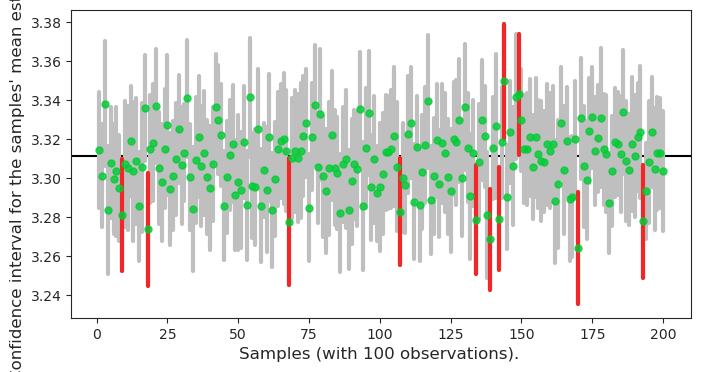

In [134]:
# changing the number of tests to 200 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 200
n = 100

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

We are 95.0 % confident that the interval,
   [2.9932188609402224, 3.614181139059778] contains the mean.


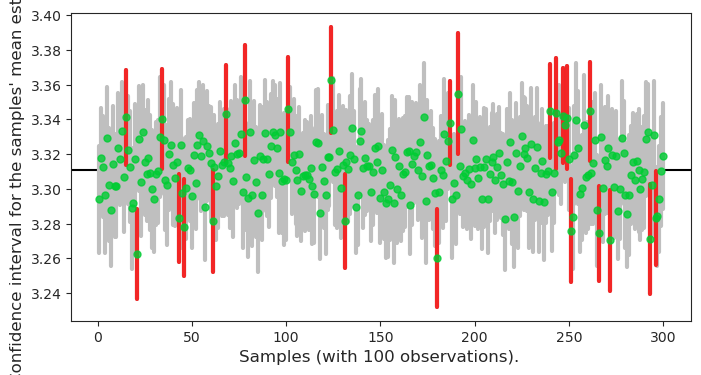

In [135]:
# changing the number of tests to 300 


# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 300
n = 100

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

**As we can see from the above plot by increasing the Number of tests we got a few more outliners than usual tests that's done before.**

<!-- BEGIN QUESTION -->

## Exercise 6

Now assume that only the good quality wines are distilled at one of the wineries. It is known they contain pH greater than and equal to 3.5. The sampled mean by a quality inspector was 3.56 for a batch of 15 such wines. What is the 95% CI for mean? 
 

In [136]:


# We are interested in only a wines which have pH greater than 3.5. 
# This becomes our population  of interest

n = 15
alpha = 0.05

# Sample Mean
Xbar = 3.56

# Filtering data for higher quality wines with pH >= 3.5 
highquality = wine[wine['pH'] >= 3.5]
sigma = highquality['pH'].std()


observations = np.random.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print('The mean is :', mu, '& the Std deviation is:', sigma)


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print('We are', round(100*confidence,3), "% confident that the interval")
print("   ", CI , "contains the mean.")


The mean is : 3.5713333333333335 & the Std deviation is: 0.1278317346395345
We are 95.0 % confident that the interval
    [3.495309405288274, 3.6246905947117263] contains the mean.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 7

Using `stats.norm.interval()`, CI can be computed.  Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [137]:

mean =3.56
sigma = np.std(wine['pH'])
CIs = stats.norm.interval(0.95,loc = mean, scale = sigma)
print('We are', round(100*confidence,3), "% confident that the interval")
print('   ', CIs , "contains the mean.")
       

We are 95.0 % confident that the interval
    (3.257502722995812, 3.8624972770041883) contains the mean.


<!-- END QUESTION -->

### Example - t distribution


If number of samples are low, it is better to use the t distribution.

Recall, the exercise from `nb.week4`.  An engineer working for Ford is interested in the population of all vehicles that have an engine size of 3.0L or larger, and is particular interested in $\mu$, the highway mileage (mpg). Assume the population is normally distributed. The sample mean among a random sample of 14 vehicles is 18.3 mpg, and the sample standard deviation is 5.1 mpg (note: $\sigma$ is unknown). What is the 95% CI for $\mu$?

In [138]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 14
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print('   ',  ci , "contains the mean.")



we are 95.0 % confident that the interval
    [15.355347668416327, 21.244652331583676] contains the mean.


## Exercise 8 

We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package - `scipy.stats.t()`

Apply `stats.t.interval()` function here to obatin the 95% CI, the sigma for this is known to be around 5.1. `xbar` is 18.3. The degrees of freedom are same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [139]:
# Use scipy.stats  
from scipy.stats import t
alpha = 0.05
df= 13 #degree of freedom is n-1=14-1=13
mean = 18.3 # xbar = 18.3
sigma = 5.1/np.sqrt(14)
CIt = stats.t.interval(1- alpha,df,loc = mean, scale = sigma)  # In t distribution standard error from standard deviation is sigma / sqrt(n)
print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print("   ", CIt , "contains the mean.")

we are 95.0 % confident that the interval
    (15.355347668416327, 21.244652331583676) contains the mean.


In [140]:
grader.check("q8")

q8 results: All test cases passed!

### Example 

Calculate the standard error using `scipy.stats.sem()`

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}



In [141]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])
print('S.E from sigma and n is: ', se)
print(' and S.E from stats is also: ', sef)

S.E from sigma and n is:  0.03300601195838153
 and S.E from stats is also:  0.03300601195838153


## Exercise 9 

Now you have worked on `stats.normal.interval` and `stats.t.interval` to compute the CI. Try to solve the questions below.

 The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 observations and the mean was 3.7. Find the 90% confidence interval for of the mean.

In [142]:
# compute the S.E (standard Error) using the formula explained earlier. 

mean = 3.7
sigma = 2.0
n = 150
SE = sigma/np.sqrt(n)
# Use the most appropriate function: norm.interval or t.interval 

# we are going to use the norm.interval because we have sample size of 150 which is greater than 30 
# In this case using norm.interval is approriate 
alpha = 0.10
CIs = stats.norm.interval(1-alpha,loc = mean, scale = SE)
# CIs = stats.t.interval(...)

print('we are', round(100*(1-alpha), 3), "% confident that the interval")
print("   ", CIs , "contains the mean.")

we are 90.0 % confident that the interval
    (3.4313965274935105, 3.9686034725064894) contains the mean.


In [143]:
grader.check("q9")

q9 results: All test cases passed!

### Extra Exercises 

Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset?
2. Distribution of sampled price?
3. CI for a case. 

**Extra Exercises**

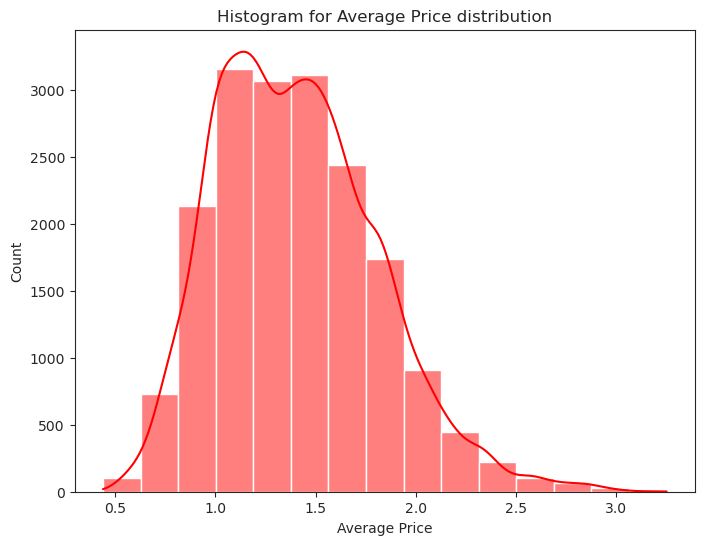

In [144]:
# distribution of average price in the dataset 
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(avacado['AveragePrice'], bins=nbins, color ='red', kde=True)
plt.title('Histogram for Average Price distribution')
plt.xlabel('Average Price')
plt.show()

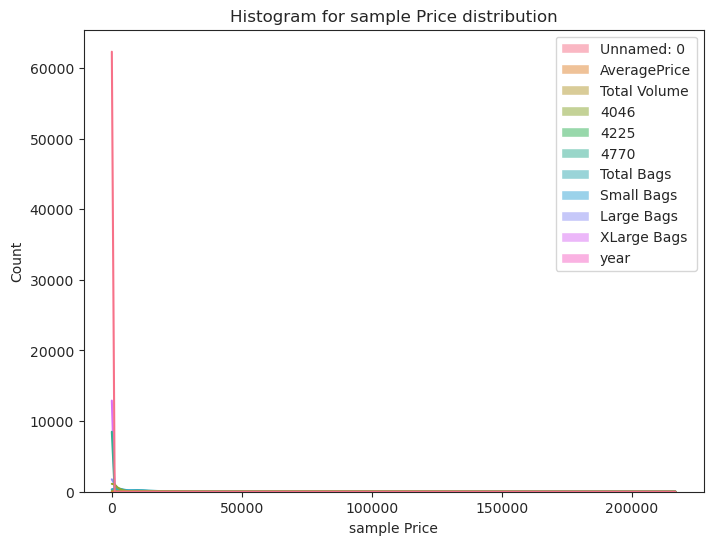

In [145]:
# distribution of sample price in the dataset 
sample_data = avacado[avacado['region'] == 'Albany']
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(sample_data, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sample Price distribution')
plt.xlabel('sample Price')
plt.show()

In [146]:
# taking 95% confidence interval
alpha = 0.05 

# Calculating the  mean and standard error
mean = sample_data['AveragePrice'].mean()
n = len(sample_data)
std = sample_data['AveragePrice'].std()
SE = std / np.sqrt(n)

# Calculate the confidence interval using stats.norm.interval as n>30 sample size is 338
CI = stats.norm.interval(1-alpha, loc=mean, scale=SE)

print('we are', round(100*(1-alpha), 3), "% confident that the interval")
print("   ", CIs , "contains the mean.")


we are 95.0 % confident that the interval
    (3.4313965274935105, 3.9686034725064894) contains the mean.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [147]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q8 results: All test cases passed!

    q9 results: All test cases passed!
